In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('station_day.csv\station_day.csv')
st = pd.read_csv('station_day.csv\stations.csv')

df.sample(10)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
18972,DL011,2019-10-07,NaN,NaN,19.86,44.85,NaN,NaN,NaN,3.67,36.13,2.15,34.30,NaN,NaN,NaN
107859,WB013,2020-01-08,127.62,236.05,125.87,42.31,168.12,31.12,1.30,5.69,36.32,19.75,33.43,NaN,305.0,Very Poor
37286,DL027,2018-05-16,71.75,134.76,14.85,35.24,45.75,32.40,1.10,4.70,69.00,0.47,0.95,NaN,186.0,Moderate
60090,KA003,2020-04-03,9.88,NaN,0.44,12.41,11.73,NaN,0.96,8.35,43.78,0.11,0.49,NaN,111.0,Moderate
95203,TN003,2017-04-16,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62199,KA005,2019-05-14,NaN,140.30,10.73,30.23,40.95,NaN,1.47,5.47,NaN,NaN,NaN,NaN,127.0,Moderate
67343,KA010,2017-04-04,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95290,TN003,2017-07-12,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51159,DL038,2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62615,KA006,2018-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **PM2.5**: Particulate Matter 2.5-micrometer (µg/m³)  
- **PM10**: Particulate Matter 10-micrometer (µg/m³)  
- **NO**: Nitric Oxide (µg/m³)  
- **NO₂**: Nitric Dioxide (µg/m³)  
- **NOₓ**: Any Nitric x-oxide (ppb)  
- **NH₃**: Ammonia (µg/m³)  
- **CO**: Carbon Monoxide (µg/m³)  
- **SO₂**: Sulphur Dioxide (µg/m³)  
- **O₃**: Ozone (µg/m³)  
- **Benzene**: Benzene (µg/m³)  
- **Toluene**: Toluene (µg/m³)  
- **Xylene**: Xylene (µg/m³)

In [4]:
st.head(10)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
5,AS001,"Railway Colony, Guwahati - APCB",Guwahati,Assam,Active
6,BR001,"Collectorate, Gaya - BSPCB",Gaya,Bihar,NaN
7,BR002,"SFTI Kusdihra, Gaya - BSPCB",Gaya,Bihar,NaN
8,BR003,"Industrial Area, Hajipur - BSPCB",Hajipur,Bihar,NaN
9,BR004,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",Muzaffarpur,Bihar,NaN


<Axes: xlabel='State'>

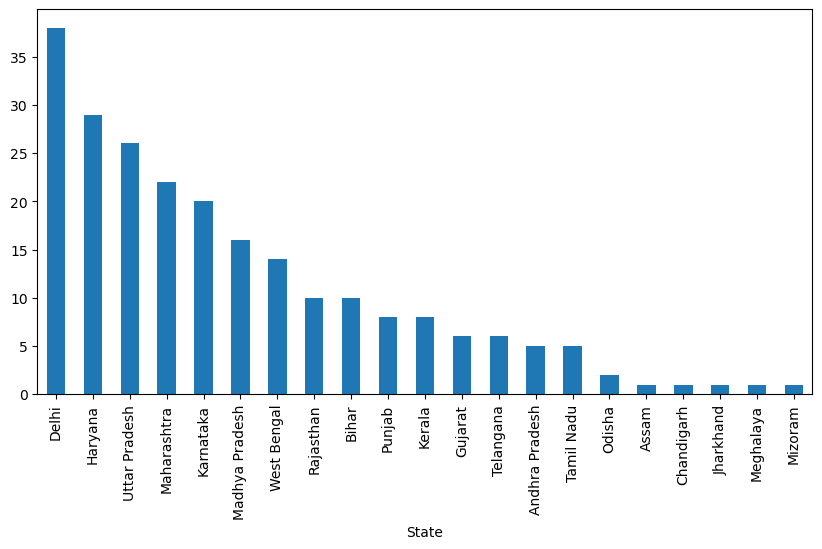

In [5]:
st['State'].value_counts().plot(kind='bar', figsize=(10,5))

In [6]:
(df.isnull().sum() / len(df)) * 100

StationId      0.000000
Date           0.000000
PM2.5         20.016661
PM10          39.529782
NO            15.833758
NO2           15.316333
NOx           14.347202
NH3           44.527237
CO            12.031286
SO2           23.329477
O3            23.666404
Benzene       29.115564
Toluene       35.823576
Xylene        78.805017
AQI           19.447401
AQI_Bucket    19.447401
dtype: float64

<Axes: xlabel='AQI_Bucket'>

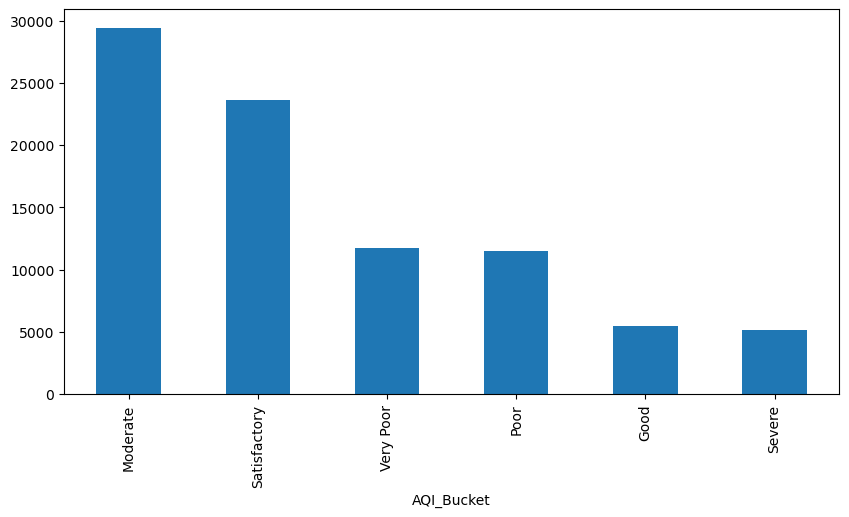

In [7]:
df['AQI_Bucket'].value_counts().plot(kind='bar', figsize=(10,5))

<Axes: ylabel='Frequency'>

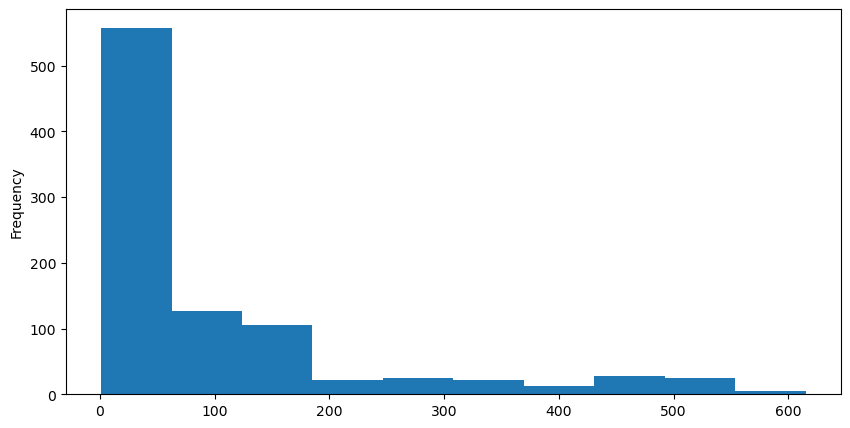

In [8]:
df['AQI'].value_counts().plot(kind='hist', figsize=(10,5))

C:\Users\snrup\AppData\Local\Temp\ipykernel_2600\1256715175.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AQI_Bucket', y='AQI', data=df, palette='Set2')


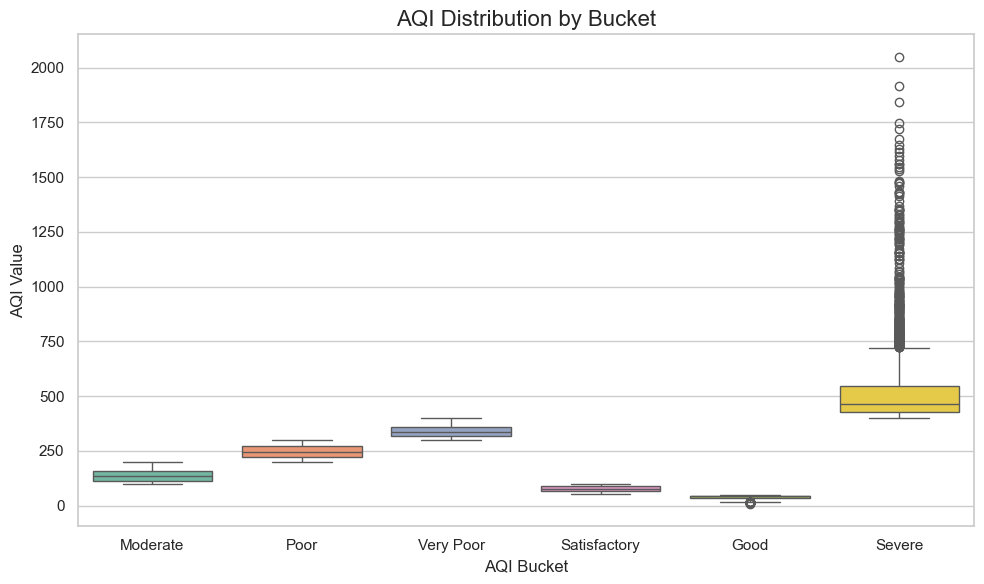

In [11]:
import seaborn as sns

df = df.dropna(subset=['AQI','AQI_Bucket'])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=df, palette='Set2')

plt.title('AQI Distribution by Bucket', fontsize=16)
plt.xlabel('AQI Bucket', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
for bucket, group in df.groupby('AQI_Bucket'):
    print(f"{bucket}: min={group['AQI'].min()}, max={group['AQI'].max()}")

Good: min=8.0, max=50.0
Moderate: min=101.0, max=200.0
Poor: min=201.0, max=300.0
Satisfactory: min=51.0, max=100.0
Severe: min=401.0, max=2049.0
Very Poor: min=301.0, max=400.0
